<a href="https://colab.research.google.com/github/TamiTrav/MVP_PUC/blob/main/Tamiris_Travassos_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

# Profs. Tatiana Escovedo e Hugo Villamizar

# **Aluna: Tamiris Severino Travassos**

## **1.Definição do problema**

O banco de dados usado nesse projeto será composto por 3 datasets: customer_demographics,  customer_services e customer_status. Eles encontram-se no Kaggle. 

A seguir temos algumas informações importantes sobre os datasets. TELCO é uma empresa jovem e com muito potencial, cujas filiais estão localizadas em 1.106 cidades do estado da Califórnia, Estados Unidos. 

O objetivo desse estudo é entender sobre a perda de clientes e se existe um padrão de churn que possamos identificar.


O problema a ser estudado nesse MVP é de aprendizado supervisionado onde basicamente se categoriza um conjunto de dados em classes, nesse estudo poderiamos usar a técnica de Classificação, categorizando os clientes em Churn e não Churn.
>

Vamos testar algumas hipóteses sobre o problema:


*   Como esta a distribuição dos clientes por sexo? 
*   Clientes mais velhos, ficam mais tempo na empresa? Qual a receita média deles?
*   Clientes casados tem mais dependentes na empresa?
*   Clientes que já indicaram um amigo, tem mais chances de permanecerem na empresa?
*   Qual o motivo de saída que é mais frequente?
*   Aceitar as ofertas diminui as chances do cliente sair?





Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/code/datacertlaboratoria/guia-de-resolu-o-projeto-5/input







**Informações sobre os atributos**



A seguir os atributos em cada dataset e sua descrição:
>


A) **customer_demographics** : 
>



  1.**Id_cliente** - ID exclusivo que identifica cada cliente.


  2.**Sexo** 


  3.**Idade**- Em anos


  4.**Abaixo_30a** - Indica se o cliente tem abaixo de 30 anos.


  5.**Senior** - Indica se o cliente tem 65 anos ou mais.


  6.**Estado_Civil** 


  7.**Dependentes** - Indica se o cliente vive ou não com um dependente que pode ser um filho, esposa (o), pai ou mãe. 


  8.**Qtde_dependentes** - Quantidade de dependentes que moram com ele.
>



B) **customer_services** :

>



1.**Id_cliente** - ID exclusivo que identifica cada cliente. 


2.**Indica_amigo** - Indica se o cliente já encaminhou um amigo ou familiar para esta 
empresa(Sim ou Não).


3.**N_indicacoes** - Indica o número de indicações que o cliente fez


4.**Tempo_trim** - Indica o número total de meses em que o cliente está na empresa no final do trimestre.


5.**Ultima_oferta_aceita** - Indica a última oferta de marketing que o cliente aceitou, se aplicável. Os valores incluem: Nenhum, Oferta A, Oferta B.


6.**Linha_tele_b** - Indica se o cliente contrata o serviço de telefonia residencial com a empresa(Sim, Não).


7.**Tarifa_linha** - Indica as tarifas médias de longa distância do cliente, mostradas no final do trimestre especificado anteriormente.


8.**Varias_linhas_tele** - Indica se o cliente contrata várias linhas telefônicas com a empresa (Sim, Não).


9.**Internet_da_empresa** - Indica se o cliente contrata internet com a empresa (Sim, Não).


10.**Tipo_internet** - Indica o tipo de internet que o cliente contrata com a empresa (DLS,Fibra Optica,Cabo).


11.**Numero_downloads** - Indica se o cliente contrata várias linhas telefônicas com a empresa (Sim, Não).


12.**Tipo_contrato** - Indica o tipo de contrato com a empresa (Mês a mês,Ano a ano).


13.**Faturamento_total** - Indica se o cliente optou pelo faturamento sem papel: Sim, Não.


14.**Tipo_pagamento** - Indica como o cliente paga sua fatura: Saque bancário, cartão de crédito, cheque enviado.


15.**Total_gasto** - Indica a cobrança mensal total atual do cliente para todos os serviços da empresa.


16.**Total_encargos** - Indica os encargos totais do cliente, calculados no final do trimestre.


17.**Reembolsos** - Indica o total de reembolsos do cliente, calculado no final do trimestre.


18.**Gasto_download** - Indica os encargos totais do cliente para downloads de dados adicionais acima dos especificados em seu plano.


19.**Total_tarifas** - Indica o total de tarifas de longa distância do cliente acima das especificadas em seu plano, ao final do trimestre especificado


20.**Receita** - Receita total
>



C) **customer_status** :

>



1.**Id_cliente** - ID exclusivo que identifica cada cliente.


2.**status** - Indica o status do cliente no final do trimestre(Churn, Cliente novo, Cliente antigo).


3.**Saida_trimestre** - Se o cliente deixou ou não a empresa naquele trimestre.


4.**Categoria_churn** - Uma categoria de alto nível para o motivo da rotatividade de clientes(Atitude, Concorrente, Insatisfação, Outros).

In [204]:
# Import 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [205]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## **2. Carga de Dados**

In [206]:
# Carrega arquivo csv usando Pandas usando uma URL
# Informa a URL de importação dos datasets

In [207]:
customer_demographics = pd.read_csv('https://raw.githubusercontent.com/TamiTrav/MVP_PUC/main/Telco_customer_churn_demographics.csv', sep=';')
#print(customer_demographics)
customer_services = pd.read_csv('https://raw.githubusercontent.com/TamiTrav/MVP_PUC/main/Telco_customer_churn_services.csv', sep=';')
#print(customer_services)
customer_status = pd.read_csv('https://raw.githubusercontent.com/TamiTrav/MVP_PUC/main/Telco_customer_churn_status.csv', sep=';')
#customer_status.head()

Após carregamos o dataset iremos explorá-lo.

A tabela demographics mostra as características demográficas dos clientes que solicitam os serviços da empresa TELCO. Grande parte dessas variáveis ​​​​estão relacionadas às informações pessoais do cliente, como o número de dependentes que possui, estado civil, idade , etc.


A tabela services mostra as características dos serviços contratados pelo cliente, entre as variáveis ​​​​importantes está o pagamento mensal feito pelo cliente à empresa, receita total, encargos adicionais atribuídos ao cliente por ultrapassar os limites de download ou consumo de dados, entre outros.

A tabela status contém informações sobre a rotatividade de clientes da empresa no próximo mês com base em vários fatores, como a informação se o cliente saiu ou não no último mês ou ainda o Índice de Satisfação, o motivo da perda de clientes, entre outros.



## **3. Análise de dados**

###**3.1 Estatísticas Descritivas**

Vamos iniciar examinando as dimensões do dataset e suas informações.

In [208]:
# Verificando que o tipo dos datasets são mesmo dataframes. Precisamos verificar para poder uni-los através do merge.
type(customer_demographics)
type(customer_services)
type(customer_status)

pandas.core.frame.DataFrame

In [209]:
# Carrega os arquivos csv e junta os datasets, tornando-os um banco de dados. 
# Explicando a técnica: Através do merge vamos unir os datasets dois a dois, pelas observações em comum  usando como chave o id_cliente. 
df1 = pd.merge(customer_demographics,customer_services,how = 'inner', on = 'id_cliente') 
print(df1)

df = pd.merge(df1,customer_status,how = 'inner', on = 'id_cliente') 
print(df)

      id_cliente    sexo  idade abaixo_30a senior estado_civil dependentes  \
0     8779-QRDMV       M     78         No    Yes           No          No   
1     7495-OOKFY       F     74         No    Yes          Yes         Yes   
2     1658-BYGOY       M     71         No    Yes           No         Yes   
3     4598-XLKNJ       F     78         No    Yes          Yes         Yes   
4     4846-WHAFZ       F     80         No    Yes          Yes         Yes   
...          ...     ...    ...        ...    ...          ...         ...   
7038  3389-KTRXV  Female    115         No     No          Yes         Yes   
7039  4020-KIUDI    Male    108         No     No          Yes         Yes   
7040  0970-QXPXW  Female    116        Yes     No           No          No   
7041  2133-TSRRM  Female    109         No     No           No         Yes   
7042  6447-GORXK    Male    108        Yes     No           No         Yes   

      qtde_dependente indica_amigo  n_indicacoes  ...  ultima_o

In [210]:
# Salvando o dataset original antes de começar as transformações
df_original = df
print(df_original)

      id_cliente    sexo  idade abaixo_30a senior estado_civil dependentes  \
0     8779-QRDMV       M     78         No    Yes           No          No   
1     7495-OOKFY       F     74         No    Yes          Yes         Yes   
2     1658-BYGOY       M     71         No    Yes           No         Yes   
3     4598-XLKNJ       F     78         No    Yes          Yes         Yes   
4     4846-WHAFZ       F     80         No    Yes          Yes         Yes   
...          ...     ...    ...        ...    ...          ...         ...   
7038  3389-KTRXV  Female    115         No     No          Yes         Yes   
7039  4020-KIUDI    Male    108         No     No          Yes         Yes   
7040  0970-QXPXW  Female    116        Yes     No           No          No   
7041  2133-TSRRM  Female    109         No     No           No         Yes   
7042  6447-GORXK    Male    108        Yes     No           No         Yes   

      qtde_dependente indica_amigo  n_indicacoes  ...  internet

In [211]:
# Mostra as dimensões do dataset
# Temos 7043 observações e 24 atributos 
print(df.shape) 

(7043, 25)


In [212]:
# Mostra as informações do dataset, os tipos de dados. 
#Verifica se tem missing nos atributos e os tipos de atributos(string, inteiro, float). 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7043 non-null   object 
 1   sexo                       7043 non-null   object 
 2   idade                      7043 non-null   int64  
 3   abaixo_30a                 7043 non-null   object 
 4   senior                     7043 non-null   object 
 5   estado_civil               7043 non-null   object 
 6   dependentes                7043 non-null   object 
 7   qtde_dependente            7043 non-null   int64  
 8   indica_amigo               7043 non-null   object 
 9   n_indicacoes               7043 non-null   int64  
 10  tempo_empresa              7043 non-null   int64  
 11  ultima_oferta_aceita       7043 non-null   object 
 12  contrata_telefonia         7043 non-null   object 
 13  tarifa_linha               7043 non-null   float

In [213]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,id_cliente,sexo,idade,abaixo_30a,senior,estado_civil,dependentes,qtde_dependente,indica_amigo,n_indicacoes,...,internet_da_empresa,tipo_internet,tipo_contrato,faturamento_papel,tipo_pagamento,receita,status,categoria_churn,motivo_churn,saida_trimestre
0,8779-QRDMV,M,78,No,Yes,No,No,0,No,0,...,Yes,DSL,Month-to-Month,Yes,Bank Withdrawal,59.65,Churned,Competitor,Competitor offered more data,Yes
1,7495-OOKFY,F,74,No,Yes,Yes,Yes,1,Yes,1,...,Yes,Fiber Optic,Month-to-Month,Yes,Credit Card,1024.10,Churned,Competitor,Competitor made better offer,Yes
2,1658-BYGOY,M,71,No,Yes,No,Yes,3,No,0,...,Yes,Fiber Optic,Month-to-Month,Yes,Bank Withdrawal,1910.88,Churned,Competitor,Competitor made better offer,Yes
3,4598-XLKNJ,F,78,No,Yes,Yes,Yes,1,Yes,1,...,Yes,Fiber Optic,Month-to-Month,Yes,Bank Withdrawal,2995.07,Churned,Dissatisfaction,Limited range of services,Yes
4,4846-WHAFZ,F,80,No,Yes,Yes,Yes,1,Yes,1,...,Yes,Fiber Optic,Month-to-Month,Yes,Bank Withdrawal,3102.36,Churned,Price,Extra data charges,Yes
5,4412-YLTKF,F,72,No,Yes,No,Yes,1,No,0,...,Yes,Fiber Optic,Month-to-Month,Yes,Bank Withdrawal,2235.41,Churned,Competitor,Competitor had better devices,Yes
6,0390-DCFDQ,F,76,No,Yes,Yes,Yes,2,Yes,1,...,Yes,Fiber Optic,Month-to-Month,Yes,Mailed Check,85.73,Churned,Other,Don't know,Yes
7,3445-HXXGF,M,66,No,Yes,Yes,No,0,Yes,6,...,Yes,DSL,Month-to-Month,Yes,Bank Withdrawal,2610.25,Churned,Dissatisfaction,Service dissatisfaction,Yes
8,2656-FMOKZ,F,70,No,Yes,No,Yes,2,No,0,...,Yes,Fiber Optic,Month-to-Month,Yes,Mailed Check,1806.75,Churned,Dissatisfaction,Limited range of services,Yes
9,2070-FNEXE,F,77,No,Yes,No,Yes,2,No,0,...,Yes,Fiber Optic,Month-to-Month,No,Bank Withdrawal,681.20,Churned,Price,Lack of affordable download/upload speed,Yes


In [214]:
# Mostra as 10 ultimas linhas do dataset. Aqui percebemos de cara que o Sexo, tem categorias que iremos ter que padronizar, pois estão como M e Male, assim como
# temos F e Female.
df.tail(10)

,id_cliente,sexo,idade,abaixo_30a,senior,estado_civil,dependentes,qtde_dependente,indica_amigo,n_indicacoes,...,internet_da_empresa,tipo_internet,tipo_contrato,faturamento_papel,tipo_pagamento,receita,status,categoria_churn,motivo_churn,saida_trimestre
7033,3726-TBHQT,Male,112,Yes,No,Yes,Yes,1,No,0,...,Yes,Fiber Optic,Two Year,Yes,Bank Withdrawal,9982.85,Stayed,NaN,NaN,No
7034,2330-PQGDQ,Male,109,No,No,Yes,Yes,3,Yes,6,...,Yes,Fiber Optic,One Year,No,Bank Withdrawal,4744.57,Stayed,NaN,NaN,No
7035,9962-BFPDU,Female,111,No,No,Yes,Yes,3,Yes,3,...,No,None,Month-to-Month,No,Credit Card,36.07,Joined,NaN,NaN,No
7036,0186-CAERR,Male,118,Yes,No,No,No,0,No,0,...,Yes,Fiber Optic,One Year,Yes,Bank Withdrawal,8514.03,Stayed,NaN,NaN,No
7037,8164-OCKUJ,Female,108,No,No,Yes,Yes,2,Yes,1,...,No,None,Two Year,No,Credit Card,1431.73,Stayed,NaN,NaN,No
7038,3389-KTRXV,Female,115,No,No,Yes,Yes,3,No,0,...,No,None,Two Year,No,Credit Card,789.18,Stayed,NaN,NaN,No
7039,4020-KIUDI,Male,108,No,No,Yes,Yes,2,Yes,8,...,No,None,Month-to-Month,No,Credit Card,281.23,Stayed,NaN,NaN,No
7040,0970-QXPXW,Female,116,Yes,No,No,No,0,No,0,...,No,None,Month-to-Month,No,Credit Card,62.07,Joined,NaN,NaN,No
7041,2133-TSRRM,Female,109,No,No,No,Yes,3,No,0,...,Yes,Fiber Optic,Month-to-Month,Yes,Bank Withdrawal,4918.56,Stayed,NaN,NaN,No
7042,6447-GORXK,Male,108,Yes,No,No,Yes,3,No,0,...,Yes,Cable,Month-to-Month,No,Credit Card,766.80,Stayed,NaN,NaN,No


In [215]:
# Verifica o tipo de dataset de cada atributo.
# Temos em sua maioria variáveis strings e poucas inteiras e floats.
df.dtypes

id_cliente                    object
sexo                          object
idade                          int64
abaixo_30a                    object
senior                        object
estado_civil                  object
dependentes                   object
qtde_dependente                int64
indica_amigo                  object
n_indicacoes                   int64
tempo_empresa                  int64
ultima_oferta_aceita          object
contrata_telefonia            object
tarifa_linha                 float64
varias_linhas_telefonicas     object
internet_da_empresa           object
tipo_internet                 object
tipo_contrato                 object
faturamento_papel             object
tipo_pagamento                object
receita                      float64
status                        object
categoria_churn               object
motivo_churn                  object
saida_trimestre               object
dtype: object

In [216]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
# A idade parece estrnha pois temos a idade máxima de 119 anos, que é raro de encontrarmos. E ainda, em média temos aproximadamente 2 indicações por cliente.
# Em média os clientes ficam 32 meses na empresa. A receita média da empresa é de 3034,37 no período estudado.
df.describe()

,idade,qtde_dependente,n_indicacoes,tempo_empresa,tarifa_linha,receita
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,47.466279,0.468692,1.951867,32.386767,22.958954,3034.379056
std,18.391529,0.962802,3.001199,24.542061,15.448113,2865.204542
min,19.000000,0.000000,0.000000,1.000000,0.000000,21.360000
25%,33.000000,0.000000,0.000000,9.000000,9.210000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,4801.145000
max,119.000000,9.000000,11.000000,72.000000,49.990000,11979.340000


Verificando a distribuição das classes.

In [217]:
#Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. 
#Podemos observar que as classes do churn estão desbalanceadas sim e futuramente teremos que tratar isso.
print(df.groupby('status').size())

status
Churned    1869
Joined      454
Stayed     4720
dtype: int64


In [218]:
#Vamos tratar as categorias dos atributos que estão sem um padrão, a exemplo do sexo e ainda iremos ajustar.
df.groupby('sexo').id_cliente.nunique()

sexo
F          638
Female    2850
M          637
Male      2918
Name: id_cliente, dtype: int64

In [219]:
# Atributos que são to tipo Sim ou Não
df = df.replace({"No": "Não"})
df = df.replace({"Yes": "Sim"})

In [220]:
# Sexo
df = df.replace({"Female": "F"})
df = df.replace({"Male": "M"})
#print(df)

In [221]:
# Tipo de oferta
df = df.replace({"None": "Nenhum"})
df = df.replace({"Offer A": "A"})
df = df.replace({"Offer B": "B"})
df = df.replace({"Offer C": "C"})
df = df.replace({"Offer D": "D"})
df = df.replace({"Offer E": "E"})

In [222]:
# Tipo de contrato
df = df.replace({"Month-to-Month": "Mensal"})
df = df.replace({"One Year": "Anual"})
df = df.replace({"Two Year": "2 em 2 anos"})

In [223]:
# Tipo de pagamento
df = df.replace({"Bank Withdrawal": "Retirada Bancária"})
df = df.replace({"Credit Card": "Cartão de Crédito"})
df = df.replace({"Mailed Check": "Cheque"})

In [224]:
# Status do cliente
df = df.replace({"Churned": "Churn"})
df = df.replace({"Joined": "Cliente novo"})
df = df.replace({"Stayed": "Cliente antigo"})

In [225]:
# Categoria Churn
df = df.replace({"Attitude": "Atitude"})
df = df.replace({"Competitor": "Concorrente"})
df = df.replace({"Dissatisfaction": "Insatisfação"})
df = df.replace({"Other": "Outro"})
df = df.replace({"Price": "Preço"})

Comentários: Agora temos as principais variávies padronizadas para podermos trabalhar.

###**3.2 Visualizações Unimodais**

Vamos criar um histograma para cada atributo do dataset, para verificarmos como está a distribuição dos dados. 

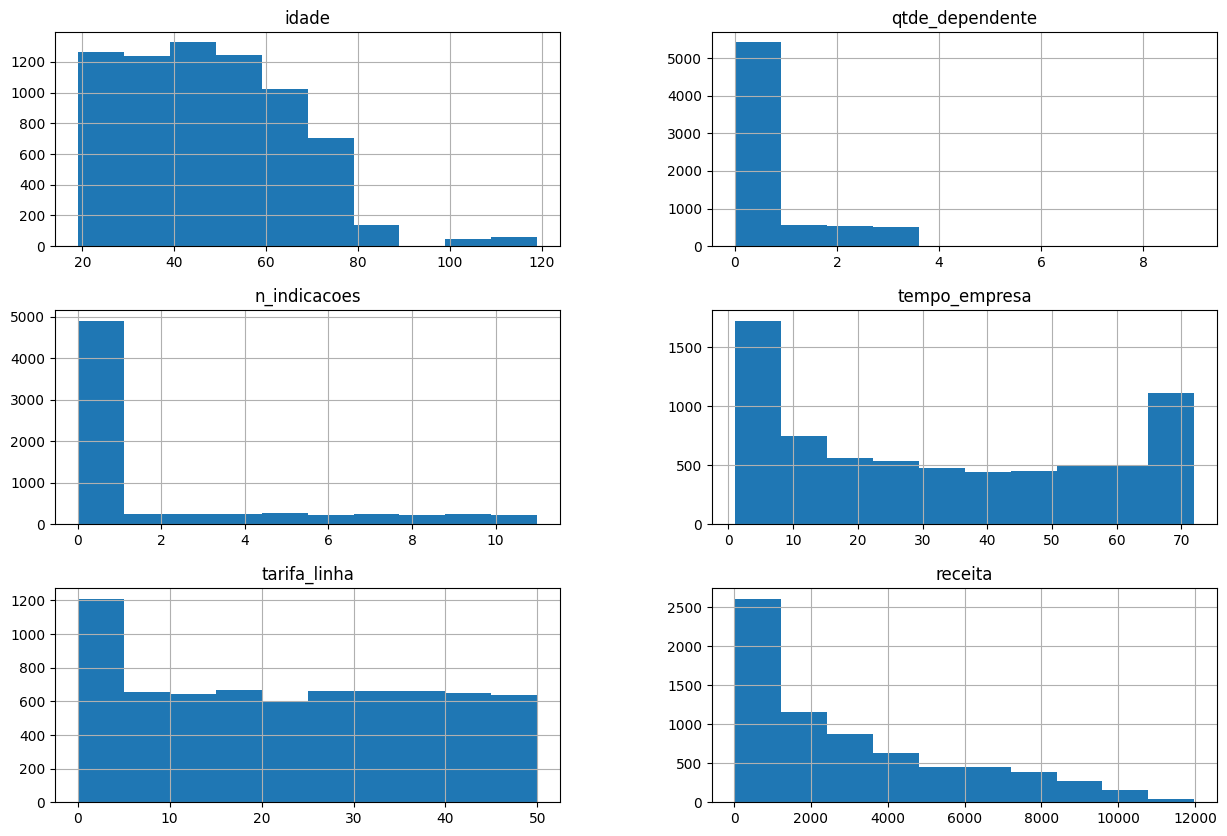

In [226]:
# Histograma
df.hist(figsize = (15,10))
plt.show()

Comentários: Vemos que o atributo receita segue uma distribuição exponencial. A quantidade de dependentes está concentrada em 1 dependente por cliente.

Temos abaixo o Gráfico de Densidade, ou Density Plot, ele é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição dos atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

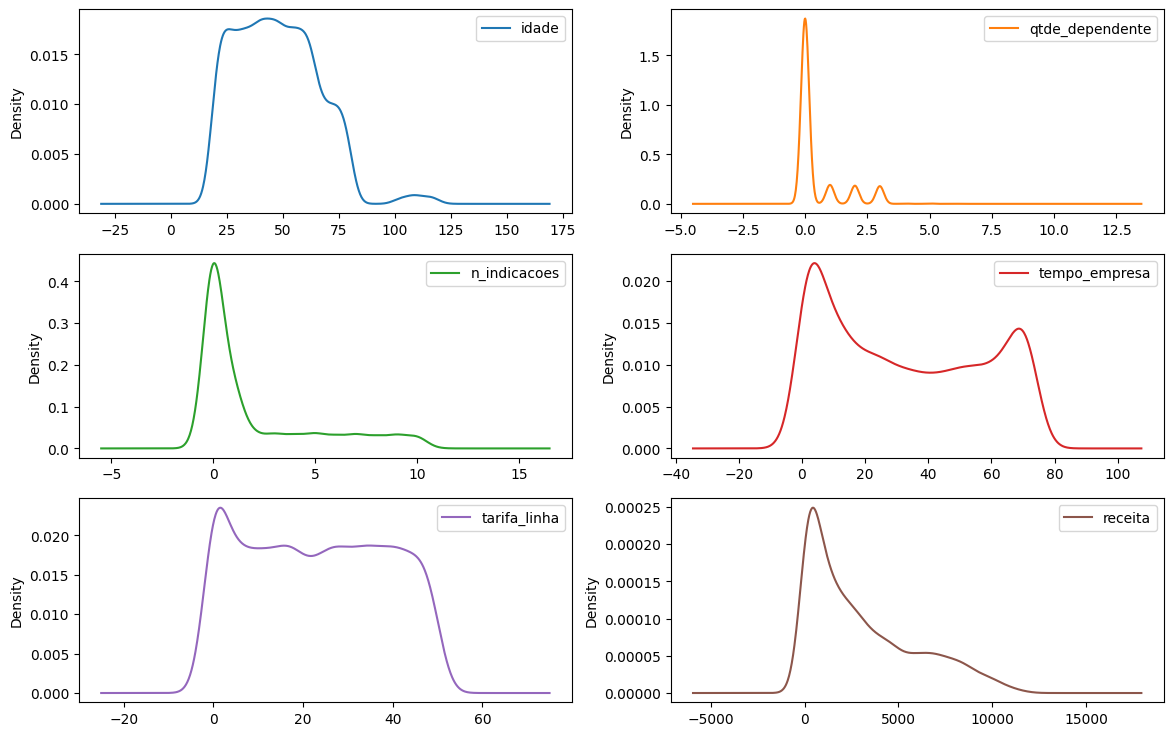

In [227]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,2), sharex = False, figsize = (14,9))
plt.show()

Comentários: Vemos que muitos dos atributos têm uma distribuição distorcida, como por exemplo os atributos receita e número de indicações. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

Vamos agora trabalhar com boxplots. No boxblot, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

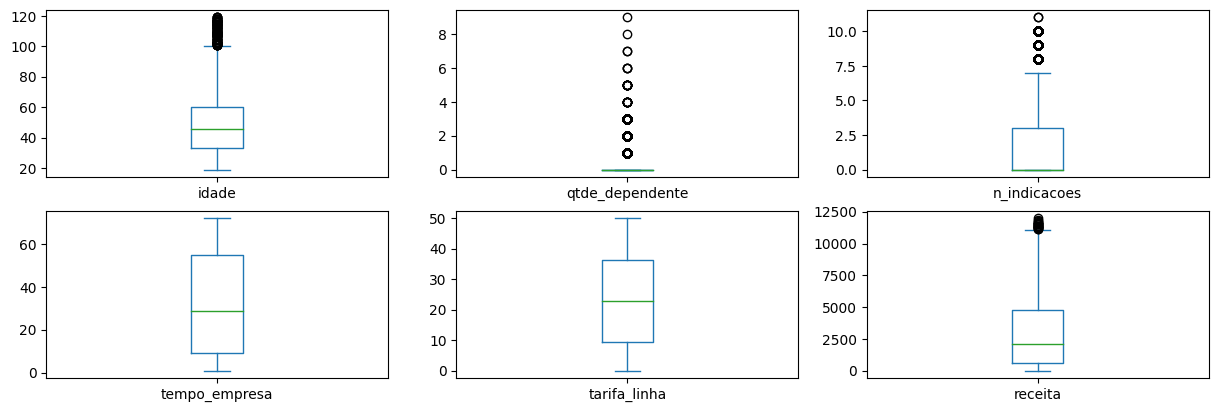

In [228]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Comentários: A exemplo, o atributo idade tem valores acima de 100, que podem ser possíveis outliers. A quantidade de dependentes está com muitos outliers, vale a investigação do que houve.

Agora iremos analisar alguns atributos individualmente.

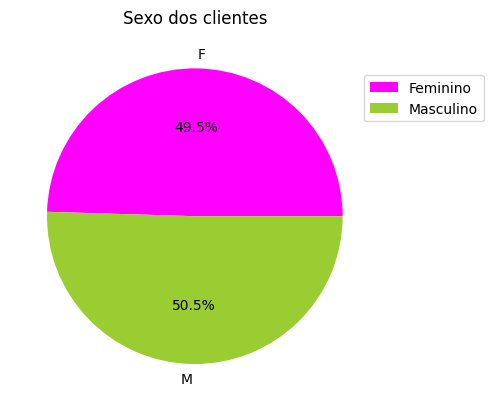

In [229]:
# Após ajustar o Sexo, iremos fazer um gráfico de pizza para ver como está a proporção
legend = 'Feminino', 'Masculino'
labels = 'F','M'
sizes = [3488,3555]

# Criando o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['magenta', 'yellowgreen'])

# Adicionando titulo ao gráfico
ax.set_title("Sexo dos clientes")

# Adicionando legenda ao gráfico
plt.legend(legend, bbox_to_anchor=(1.3, 0.9),loc='upper right')

Comentários: A distribuição do sexo está muito equilibrada, tendo um pouco a mais de homens na empresa, representando 50.5% de todos os clientes.

<Axes: xlabel='senior', ylabel='tempo_empresa'>

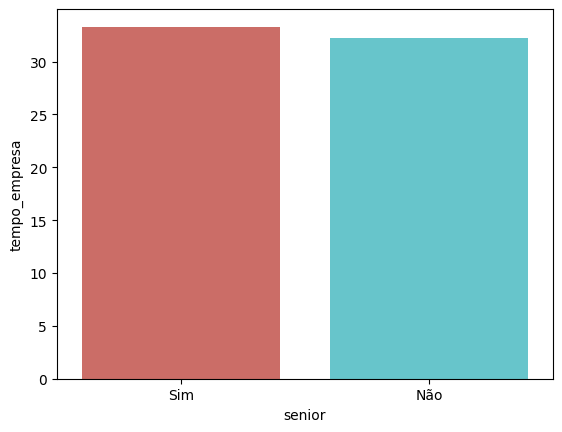

In [230]:
# Gráfico de barras dos clientes com mais de 60 anos x tempo na empresa
sns.barplot(data=df, x="senior", y="tempo_empresa",ci = None,palette = 'hls')

Comentários: Olhando para o grupo de Clientes senior (mais de 60 anos de idade), eles ficam mais de 40 meses na empresa e em sua grande maioria são considerados clientes antigos.

<Axes: xlabel='status', ylabel='tempo_empresa'>

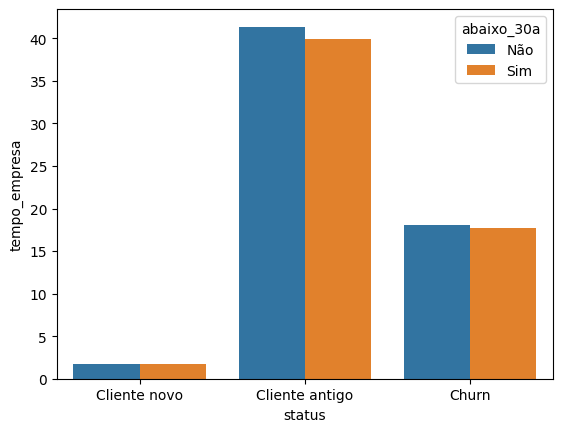

In [231]:
# Gráfico de barras dos clientes com menos de 30 anos x tempo na empresa
sns.barplot(data=df, x="status", y="tempo_empresa", hue="abaixo_30a",ci = None,order = ["Cliente novo", "Cliente antigo", "Churn"])

Comentários: Um fato curioso é que a quantidade de clientes que saíram da empresa ficou próxima independente se tinha ou não menos de 30 anos.

In [232]:
# Calculando a receita média dos clientes acima de 60 anos e abaixo de 30 anos.
velho = df.groupby('senior')['receita'].mean()
print(velho)

novo = df.groupby('abaixo_30a')['receita'].mean()
print(novo)

senior
Não    2927.606204
Sim    3586.101121
Name: receita, dtype: float64
abaixo_30a
Não    3050.886930
Sim    2967.899807
Name: receita, dtype: float64


Comentários: Clientes acima de 60 anos de idade geram uma receita média de 3586.10 reais. Enquanto clientes abaixo de 30 anos geram uma receita média menor (2967.89 reais).

<Axes: xlabel='status', ylabel='tempo_empresa'>

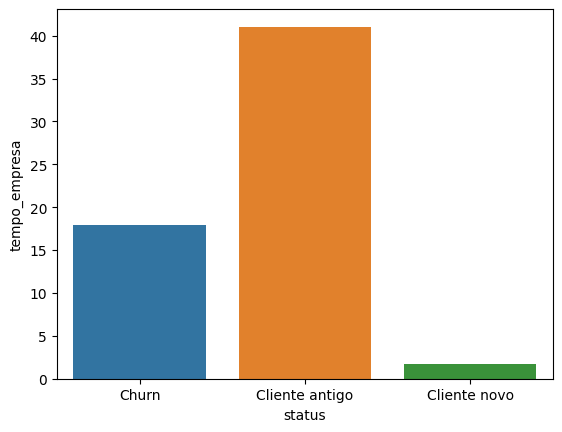

In [233]:
# Gráfico com o status x tempo de empresa
sns.barplot(data=df, x="status", y="tempo_empresa",ci = None)

Comentários: O tempo de empresa é realmente maior para clientes antigos e está em torno de 40 meses, já o de clientes que seriam churn, está em 18 meses aproximadamente. Um ponto de atenção para os clientes que alcançaram os 18 meses, seria ideal acompanhar como eles estão para evitar que saíssem da empresa.

<Axes: xlabel='status', ylabel='qtde_dependente'>

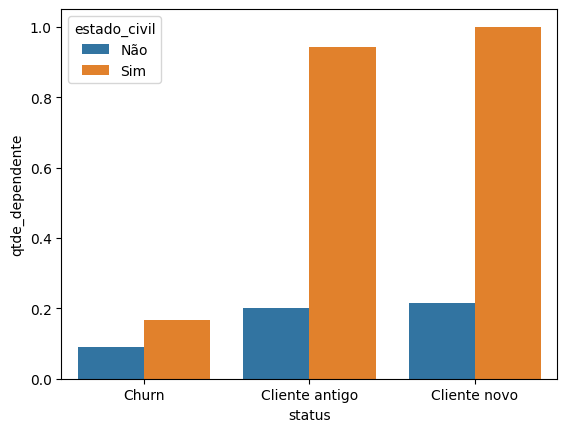

In [234]:
# Gráfico da quantidade de dependentes x estado civil x status
sns.barplot(data=df, x="status", y="qtde_dependente", hue="estado_civil",ci =  None)

Comentários: Clientes casados tem mais dependentes e compõem a maioria dos clientes da empresa.

<Axes: xlabel='status', ylabel='n_indicacoes'>

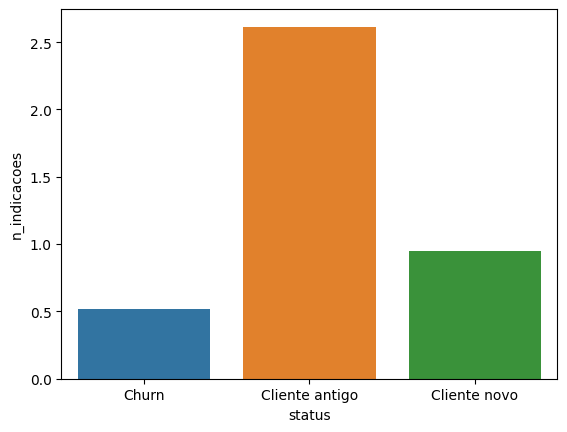

In [235]:
sns.barplot(data=df, y="n_indicacoes", x="status",ci =  None)

Comentários: Através do gráfico, podemos identificar que quem mais indicou a empresa pra amigos foram os clientes antigos.

In [236]:
# Agrupa as informações da quantidade de indicações por status de cliente
aux = df.groupby((['status']), as_index=False)['n_indicacoes'].sum()
print(aux)

           status  n_indicacoes
0           Churn           974
1  Cliente antigo         12342
2    Cliente novo           431


Comentários: Clientes antigos fizeram 12.342 indicações, enquanto que os novos apenas 431. Entende-se que eles tem mais chances de continuar na empresa, dado que estão indicando bastante.

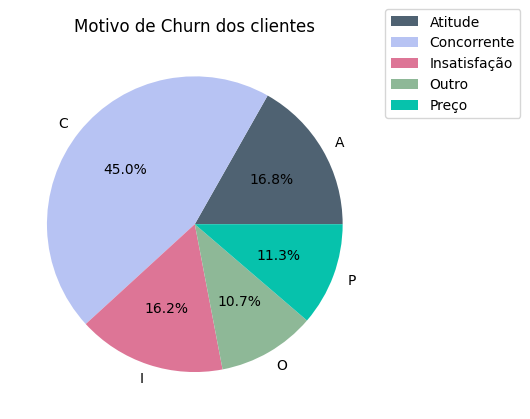

In [237]:
# Verificando as categorias do churn para gerar o gráfico e ver como está a proporção por cliente
df.groupby('categoria_churn').id_cliente.nunique()

# Após balancear o Sexo, iremos fazer um gráfico de pizza para ver como está a proporção
legend = 'Atitude','Concorrente', 'Insatisfação', 'Outro', 'Preço'
labels = 'A','C','I','O','P'
sizes = [314,841,303,200,211]
col = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897','#06C2AC']
# Criando o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=col)

# Adicionando titulo ao gráfico
ax.set_title("Motivo de Churn dos clientes")

# Adicionando legenda ao gráfico
plt.legend(legend, bbox_to_anchor=(1.4, 1.1),loc='upper right')

Comentários: Aqui verificamos que a maioria dos clientes (45%) saem para irem pra concorrência e o segundo maior motivo de saída é a atitude (16.8%). 

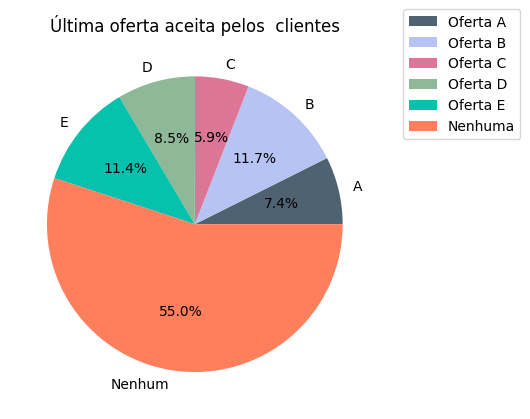

In [238]:
# Verificando a proporção de ofertas aceitas por cliente
df.groupby('ultima_oferta_aceita').id_cliente.nunique()

# Iremos fazer um gráfico de pizza para ver como está a proporção das ofertas
legend = 'Oferta A','Oferta B', 'Oferta C', 'Oferta D', 'Oferta E', 'Nenhuma'
labels = 'A','B','C','D','E','Nenhum'
sizes = [520,824,415,602,805,3877]
col = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897','#06C2AC','#FF7F5D']
# Criando o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=col)

# Adicionando titulo ao gráfico
ax.set_title("Última oferta aceita pelos  clientes")

# Adicionando legenda ao gráfico
plt.legend(legend, bbox_to_anchor=(1.4, 1.1),loc='upper right')


Comentários: Mais da metade (55%) dos clientes não aceitou nenhuma oferta nos ultimos meses. Isso pode aumentar o risco deles sairem. Enquanto que a Oferta B é a mais aceita entre eles (11.7%).

### **3.3. Visualizações Multimodais**

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1 : há uma correlação negativa entre as variáveis, 
>
Próximo de +1: há uma correlação positiva entre as variáveis.
>
0: não há correlação entre as variáveis.

OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A matriz de correlação exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

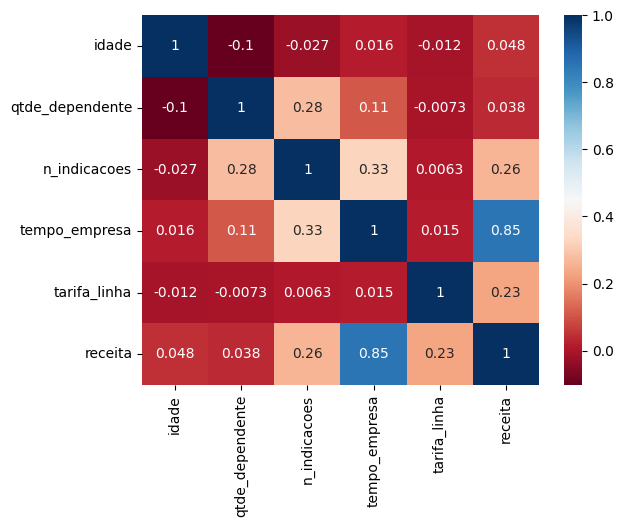

In [239]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

Comentários: A matriz de correlação nos mostra que existe uma forte correlação entre a receita e o tempo de empresa e também da quantidade de dependentes com o número de indicações. Os atributos receita e o tempo de empresa poderão ser um problema quando iniciarmos o modelo pois tem a correlação forte.

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

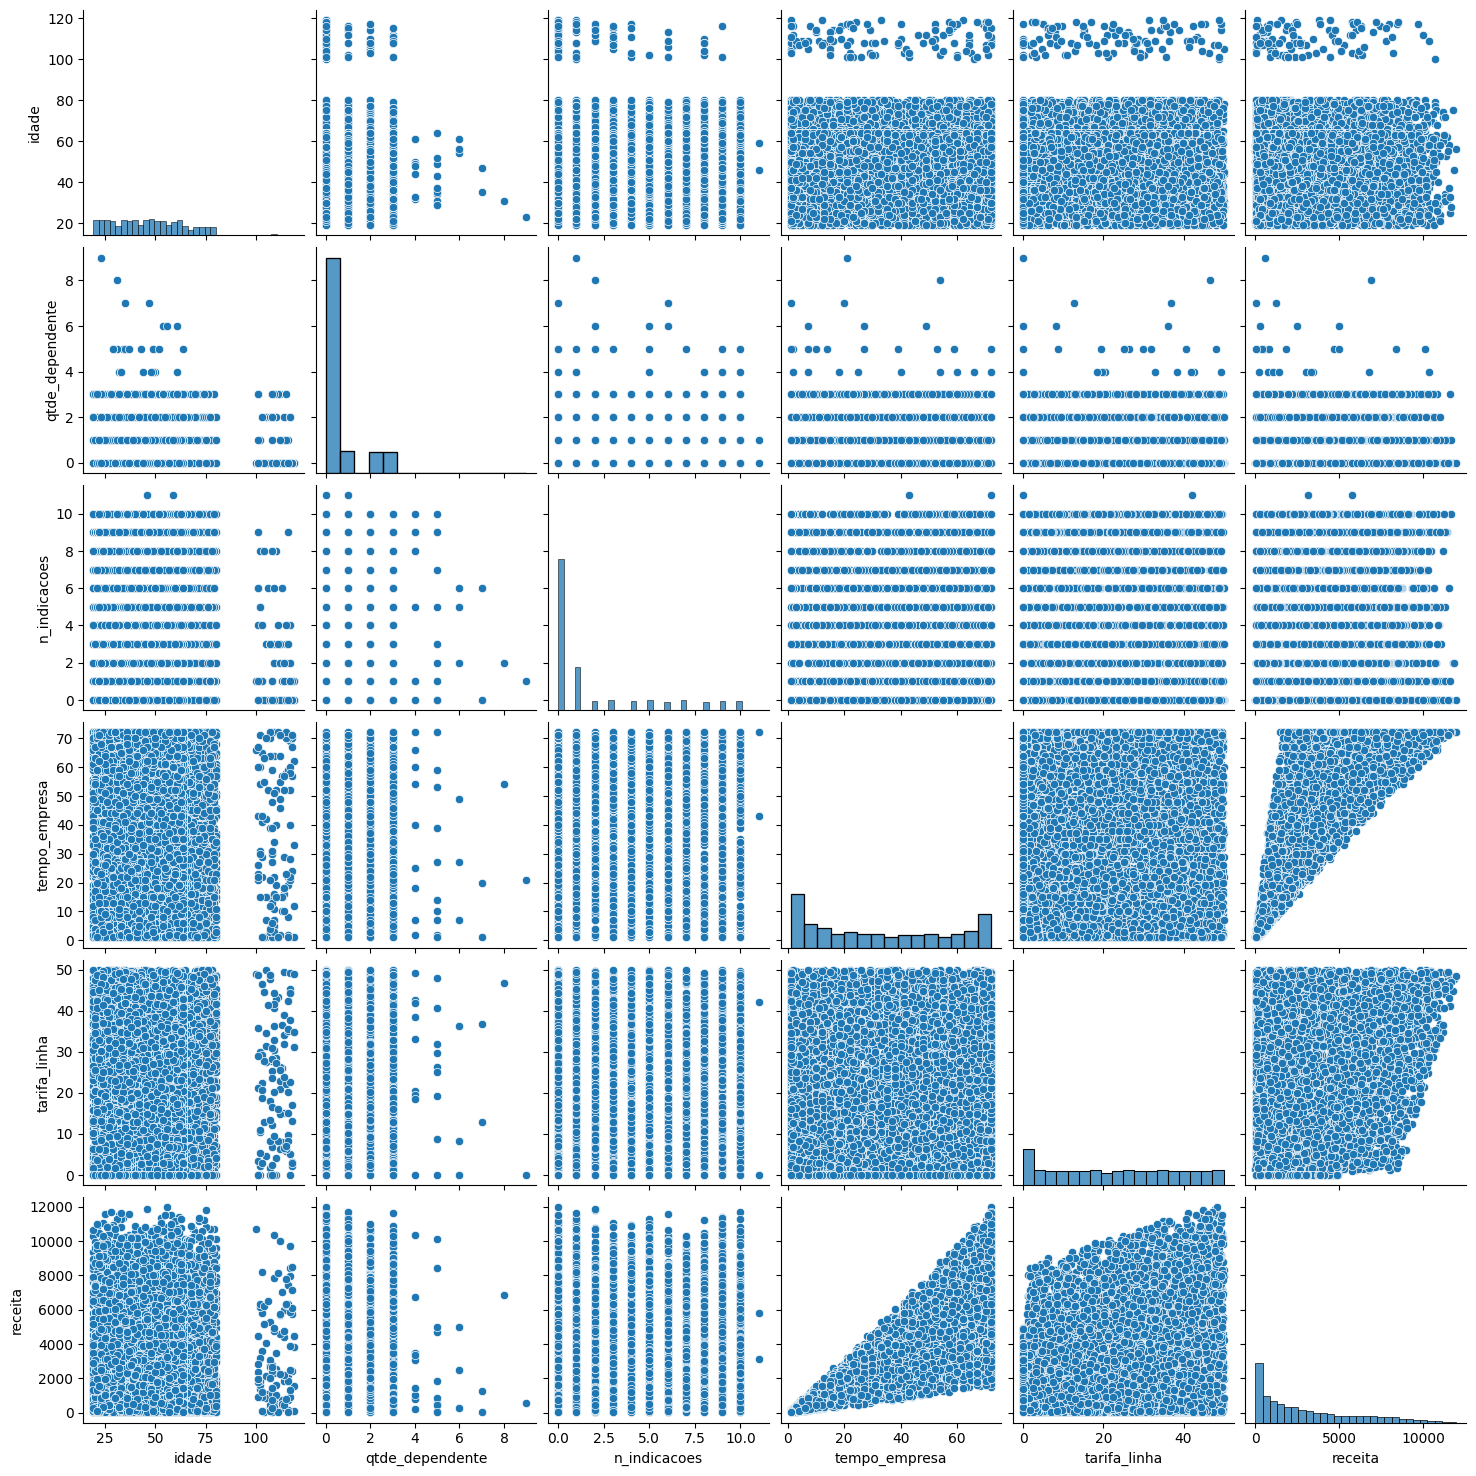

In [240]:
# Scatter Plot com Seaborn 
sns.pairplot(df)

Comentários: Novamente verificamos que existe uma forte correlação entre a receita e o tempo de empresa.

## **4. Pré-Processamento de dados**

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook.

##**4.1 Tratamento de Missing e Limpeza**

Já vimos que o dataset de telecomunicações da empresa TELCO tem missings aparentes, como valores "NAN" que parecem ser missings. Vamos então investigar e fazer o tratamento necessário e criar uma nova visão do nosso dataset. Os atributos categoria churn e motivo churn tem 5174 missings.

In [241]:
# verificando nulls no dataset
df.isnull().sum()

id_cliente                      0
sexo                            0
idade                           0
abaixo_30a                      0
senior                          0
estado_civil                    0
dependentes                     0
qtde_dependente                 0
indica_amigo                    0
n_indicacoes                    0
tempo_empresa                   0
ultima_oferta_aceita            0
contrata_telefonia              0
tarifa_linha                    0
varias_linhas_telefonicas       0
internet_da_empresa             0
tipo_internet                   0
tipo_contrato                   0
faturamento_papel               0
tipo_pagamento                  0
receita                         0
status                          0
categoria_churn              5174
motivo_churn                 6567
saida_trimestre                 0
dtype: int64

In [242]:
# Os atributos que possuem missing são a categoria churn e o motivo churn.
# Agora estamos investigando  a hipótese pra ver se os missings nos atributos categoria churn e motivo churn se dão devido ao 
# atributo status estar como 'Churn', logo o cliente não tem motivo de churn nessa categoria. 
indice = df[df['status'] =='Churn']
print(indice)

      id_cliente sexo  idade abaixo_30a senior estado_civil dependentes  \
0     8779-QRDMV    M     78        Não    Sim          Não         Não   
1     7495-OOKFY    F     74        Não    Sim          Sim         Sim   
2     1658-BYGOY    M     71        Não    Sim          Não         Sim   
3     4598-XLKNJ    F     78        Não    Sim          Sim         Sim   
4     4846-WHAFZ    F     80        Não    Sim          Sim         Sim   
...          ...  ...    ...        ...    ...          ...         ...   
6961  3523-QRQLL    F    116        Sim    Não          Sim         Não   
6962  2219-MVUSO    M    116        Não    Não          Não         Não   
6963  4013-TLDHQ    M    116        Não    Não          Não         Não   
6964  0515-YPMCW    M    110        Não    Não          Não         Não   
6965  8854-CCVSQ    M    114        Não    Não          Não         Não   

      qtde_dependente indica_amigo  n_indicacoes  ...  internet_da_empresa  \
0                   0

In [243]:
# Abaixo conclui-se que a hipótese de que os missings nessas duas colunas se dão devido ao status estar como 'Churn'.  
indice.isnull().sum()

id_cliente                      0
sexo                            0
idade                           0
abaixo_30a                      0
senior                          0
estado_civil                    0
dependentes                     0
qtde_dependente                 0
indica_amigo                    0
n_indicacoes                    0
tempo_empresa                   0
ultima_oferta_aceita            0
contrata_telefonia              0
tarifa_linha                    0
varias_linhas_telefonicas       0
internet_da_empresa             0
tipo_internet                   0
tipo_contrato                   0
faturamento_papel               0
tipo_pagamento                  0
receita                         0
status                          0
categoria_churn                 0
motivo_churn                 1393
saida_trimestre                 0
dtype: int64

<Axes: >

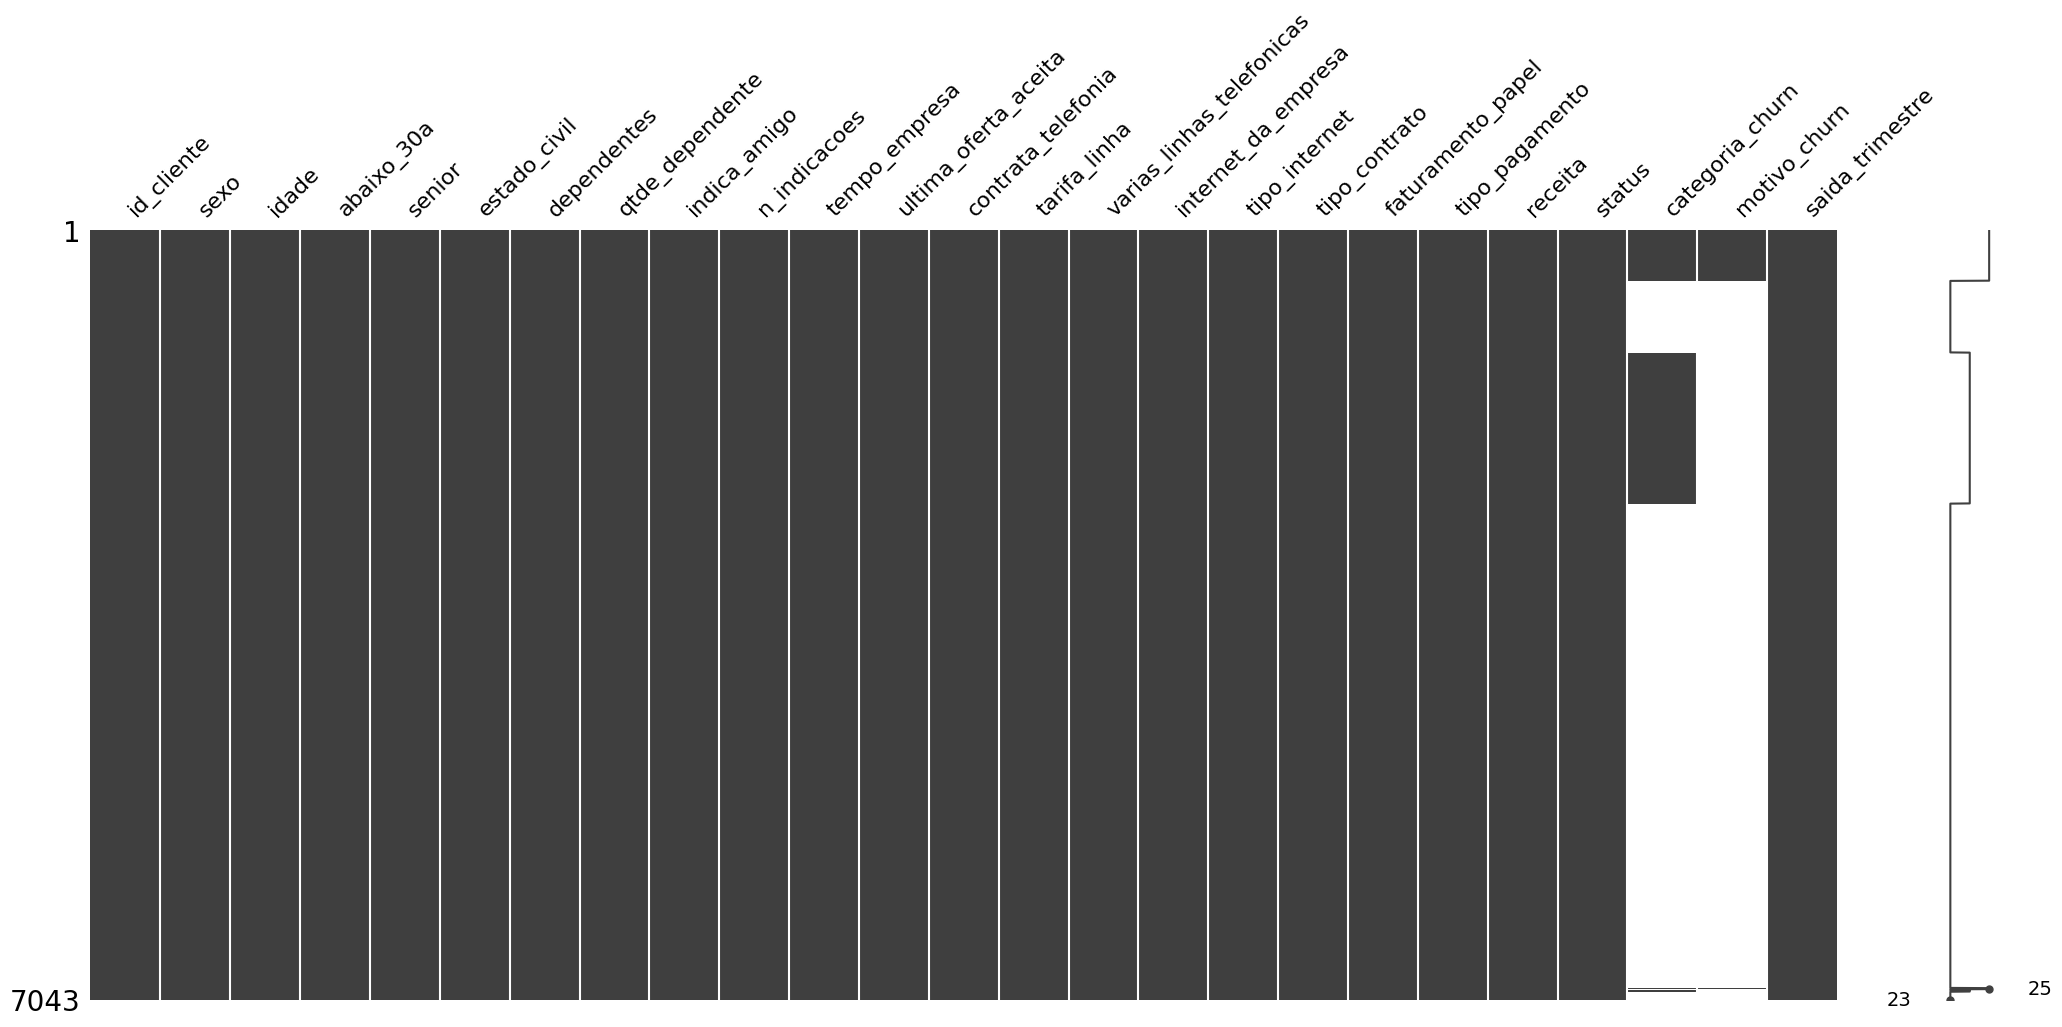

In [244]:
# salvando um NOVO dataset para tratamento de missings, por boas práticas.
# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset com todas as colunas
atributos = df[col[:]]

# exibindo visualização matricial da nulidade do dataset sem a alteração dos NaN para "Não se aplica"
ms.matrix(df)

<Axes: >

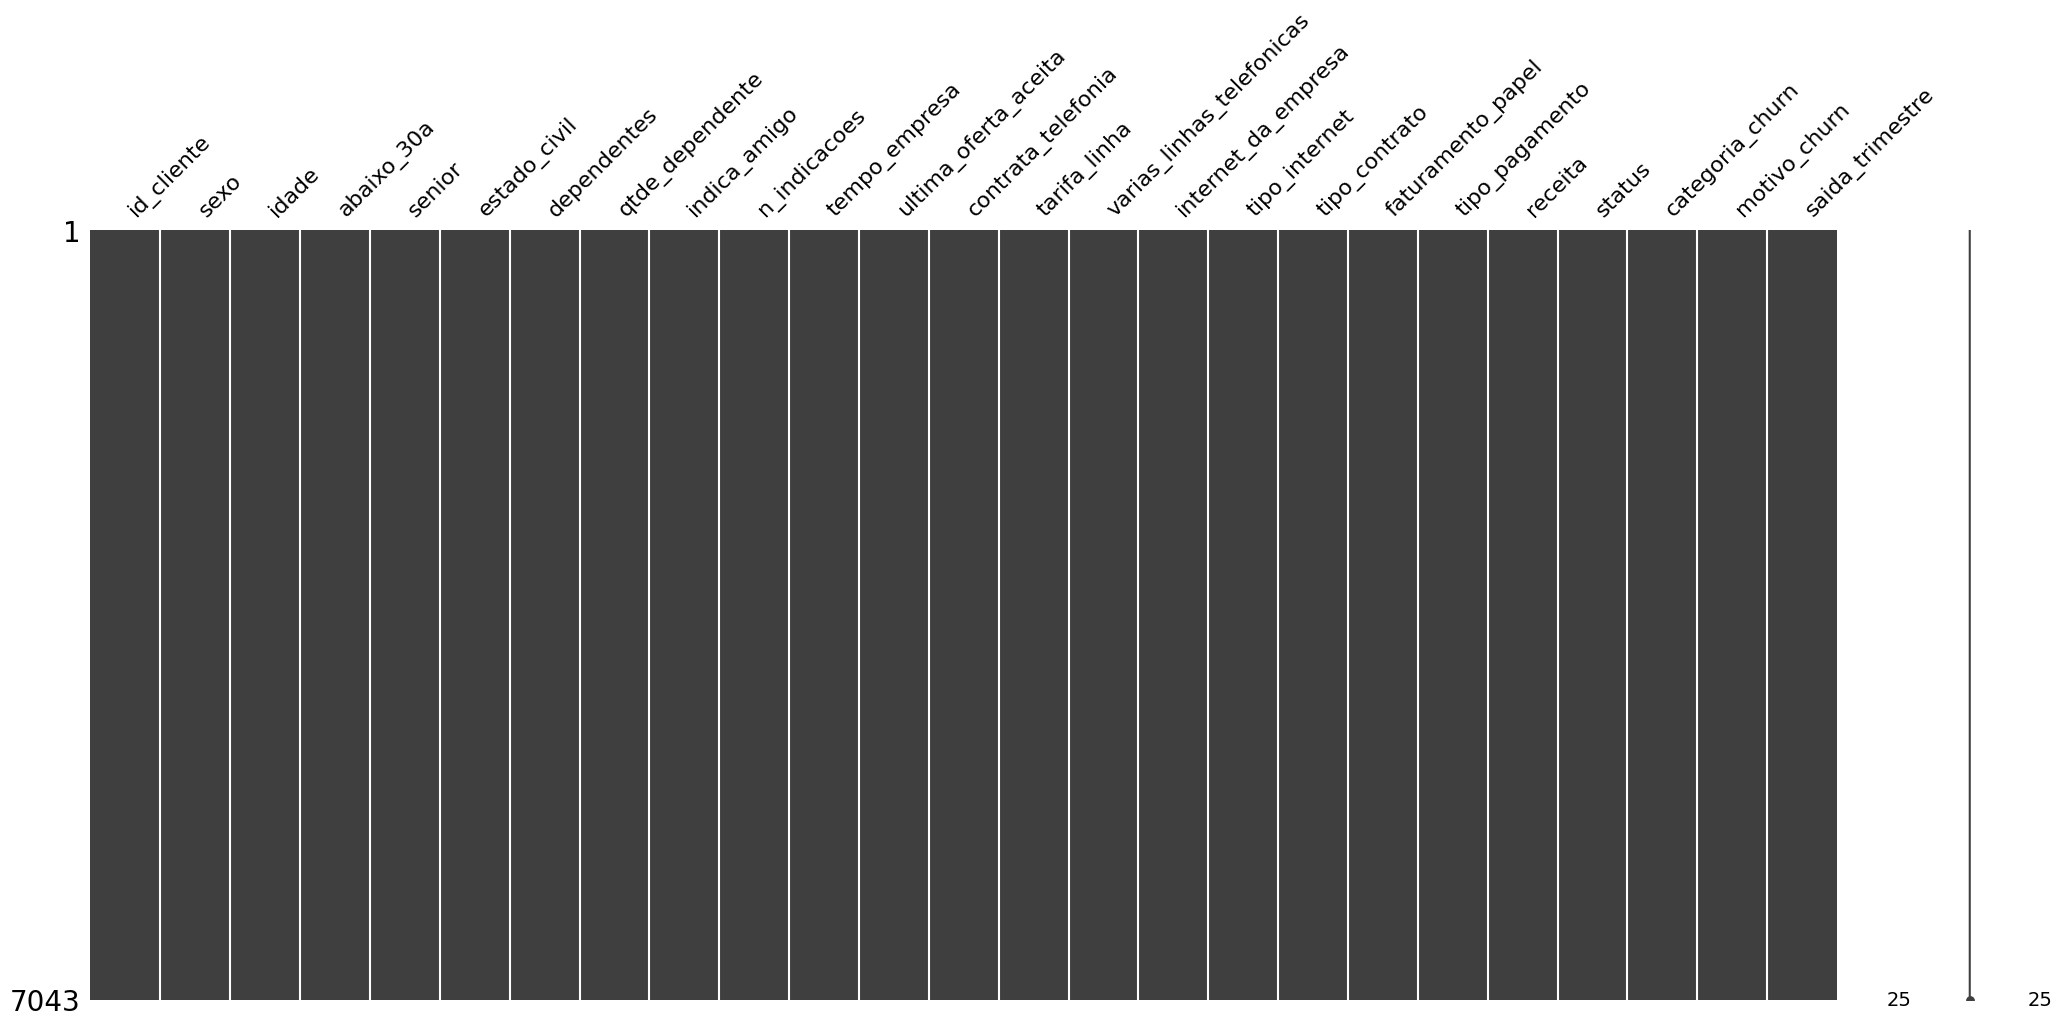

In [245]:
# exibindo a visualização matricial da nulidade do dataset após a alteração dos NaN para "Não se aplica"
# substituindo os NaN, por não se aplica
atributos['motivo_churn'] = df['motivo_churn'].replace(np.nan, "Not applicable")
atributos['categoria_churn'] = df['categoria_churn'].replace(np.nan, "Not applicable")

ms.matrix(atributos)

In [246]:
# guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# exibindo as primeiras linhas
datasetSemMissings.tail()

,id_cliente,sexo,idade,abaixo_30a,senior,estado_civil,dependentes,qtde_dependente,indica_amigo,n_indicacoes,...,internet_da_empresa,tipo_internet,tipo_contrato,faturamento_papel,tipo_pagamento,receita,status,categoria_churn,motivo_churn,saida_trimestre
7038,3389-KTRXV,F,115,Não,Não,Sim,Sim,3,Não,0,...,Não,Nenhum,2 em 2 anos,Não,Cartão de Crédito,789.18,Cliente antigo,Not applicable,Not applicable,Não
7039,4020-KIUDI,M,108,Não,Não,Sim,Sim,2,Sim,8,...,Não,Nenhum,Mensal,Não,Cartão de Crédito,281.23,Cliente antigo,Not applicable,Not applicable,Não
7040,0970-QXPXW,F,116,Sim,Não,Não,Não,0,Não,0,...,Não,Nenhum,Mensal,Não,Cartão de Crédito,62.07,Cliente novo,Not applicable,Not applicable,Não
7041,2133-TSRRM,F,109,Não,Não,Não,Sim,3,Não,0,...,Sim,Fiber Optic,Mensal,Sim,Retirada Bancária,4918.56,Cliente antigo,Not applicable,Not applicable,Não
7042,6447-GORXK,M,108,Sim,Não,Não,Sim,3,Não,0,...,Sim,Cable,Mensal,Não,Cartão de Crédito,766.80,Cliente antigo,Not applicable,Not applicable,Não


##**4.2 Transformação dos dados**

#Separação em conjunto de treino e conjunto de teste

In [247]:
# Separando apenas os atributos que iremos utilizar
df2 = datasetSemMissings.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,20,21,22]]
print(df2)

      id_cliente sexo  idade abaixo_30a senior estado_civil dependentes  \
0     8779-QRDMV    M     78        Não    Sim          Não         Não   
1     7495-OOKFY    F     74        Não    Sim          Sim         Sim   
2     1658-BYGOY    M     71        Não    Sim          Não         Sim   
3     4598-XLKNJ    F     78        Não    Sim          Sim         Sim   
4     4846-WHAFZ    F     80        Não    Sim          Sim         Sim   
...          ...  ...    ...        ...    ...          ...         ...   
7038  3389-KTRXV    F    115        Não    Não          Sim         Sim   
7039  4020-KIUDI    M    108        Não    Não          Sim         Sim   
7040  0970-QXPXW    F    116        Sim    Não          Não         Não   
7041  2133-TSRRM    F    109        Não    Não          Não         Sim   
7042  6447-GORXK    M    108        Sim    Não          Não         Sim   

      qtde_dependente indica_amigo  n_indicacoes  tempo_empresa  \
0                   0          N

In [248]:
# exibindo as primeiras linhas
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7043 non-null   object 
 1   sexo                  7043 non-null   object 
 2   idade                 7043 non-null   int64  
 3   abaixo_30a            7043 non-null   object 
 4   senior                7043 non-null   object 
 5   estado_civil          7043 non-null   object 
 6   dependentes           7043 non-null   object 
 7   qtde_dependente       7043 non-null   int64  
 8   indica_amigo          7043 non-null   object 
 9   n_indicacoes          7043 non-null   int64  
 10  tempo_empresa         7043 non-null   int64  
 11  ultima_oferta_aceita  7043 non-null   object 
 12  receita               7043 non-null   float64
 13  status                7043 non-null   object 
 14  categoria_churn       7043 non-null   object 
dtypes: float64(1), int64(

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos.

Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 13) e qual é a coluna das classes (Y - 13). Em seguida, especificaremos o tamanho do conjunto de teste desejado.

Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [249]:
# Usando o dataset original. Deixando 20% dos dados para teste.
test_size = 0.20
seed = 42

# separando o array em componentes de input e output - treino e teste
X = df.values[:,0:21]
y = df.values[:,21]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size,random_state=seed, stratify=y) # com estratificação

In [250]:
# Usando o dataset transformado. Deixando 20% dos dados para teste  e 80% pra treino.
# separando o array em componentes de input e output
Xx = df2.values[:,0:13]
yy = df2.values[:,13]
X_train_x, X_test_x, y_train_y, y_test_y = train_test_split(Xx, yy,
    test_size=test_size,random_state=seed, stratify=yy) # com estratificação